In [1]:
import glob
import math
import sys
import timeit

sys.path.insert(0, '../../')
from visualize_dataset import *
from losses import *
from metrics import *
from predict import *
from train import *
from utils import *

Using TensorFlow backend.


In [2]:
path_train_images = '../../../data/stanford_adc_cropped/train/Slice/'
path_train_annotations = '../../../data/stanford_adc_cropped/train/ROI/'
path_train_predictions = './predictions.50e/train/'

path_val_images = '../../../data/stanford_adc_cropped/val/Slice/'
path_val_annotations = '../../../data/stanford_adc_cropped/val/ROI/'
path_val_predictions = './predictions.50e/val/'

path_test_images = '../../../data/stanford_adc_cropped/test/Slice/'
path_test_annotations = '../../../data/stanford_adc_cropped/test/ROI/'
path_test_predictions = './predictions.50e/test/'

path_save_weights = './weights.50e/'
path_load_weights = None

train_vgg = False
path_vgg_weights = '../../../data/vgg16_weights_th_dim_ordering_th_kernels.h5'

n_classes = 2
input_height = 224
input_width = 224
n_channel_annotations = 1

In [3]:
print('Number train images: ', len(glob.glob(path_train_images + '*.png')))
print('Number val images: ', len(glob.glob(path_val_images + '*.png')))
print('Number test images: ', len(glob.glob(path_test_images + '*.png')))

('Number train images: ', 192)
('Number val images: ', 11)
('Number test images: ', 12)


In [4]:
model_name = 'vgg_segnet'
epochs = 50
train_batch_size = 8
val_batch_size = len(glob.glob(path_val_images + '*.png'))

In [5]:
optimizer = 'adadelta'
metrics = ['accuracy', dice, iou]

class_props = calc_class_proportions(path_train_annotations, n_classes, n_channel_annotations)
class_weights = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations)
class_weights_log = calc_class_weights(path_train_annotations, n_classes, n_channel_annotations, scale = 'log')

print(class_props)
print(class_weights)
print(class_weights_log)

loss = weighted_categorical_crossentropy_loss(class_weights_log)

[0.98175173 0.01824827]
[ 1.         53.79972696]
[0.01841682 4.00368521]


('Model output shape', (None, 50176, 2))
('Epoch', 0)
Epoch 1/1
24/24 [==============================] - 479s 20s/step - loss: 0.0263 - acc: 0.6793 - dice: 0.1001 - iou: 0.0529 - val_loss: 0.0297 - val_acc: 0.6434 - val_dice: 0.0454 - val_iou: 0.0232
('Epoch', 1)
Epoch 1/1
24/24 [==============================] - 625s 26s/step - loss: 0.0168 - acc: 0.7484 - dice: 0.1270 - iou: 0.0681 - val_loss: 0.0222 - val_acc: 0.7586 - val_dice: 0.0611 - val_iou: 0.0315
('Epoch', 2)
Epoch 1/1
24/24 [==============================] - 642s 27s/step - loss: 0.0145 - acc: 0.7988 - dice: 0.1537 - iou: 0.0836 - val_loss: 0.0257 - val_acc: 0.8419 - val_dice: 0.0741 - val_iou: 0.0385
('Epoch', 3)
Epoch 1/1
24/24 [==============================] - 652s 27s/step - loss: 0.0132 - acc: 0.8388 - dice: 0.1855 - iou: 0.1029 - val_loss: 0.0480 - val_acc: 0.9048 - val_dice: 0.0554 - val_iou: 0.0285
('Epoch', 4)
Epoch 1/1
24/24 [==============================] - 645s 27s/step - loss: 0.0146 - acc: 0.8324 - dice: 0.17

('Epoch', 39)
Epoch 1/1
24/24 [==============================] - 651s 27s/step - loss: 0.0033 - acc: 0.9837 - dice: 0.7097 - iou: 0.5671 - val_loss: 0.0594 - val_acc: 0.6364 - val_dice: 0.0424 - val_iou: 0.0217
('Epoch', 40)
Epoch 1/1
24/24 [==============================] - 647s 27s/step - loss: 0.0047 - acc: 0.9653 - dice: 0.5146 - iou: 0.3524 - val_loss: 0.0487 - val_acc: 0.9344 - val_dice: 0.0859 - val_iou: 0.0449
('Epoch', 41)
Epoch 1/1
24/24 [==============================] - 643s 27s/step - loss: 0.0041 - acc: 0.9684 - dice: 0.5358 - iou: 0.3711 - val_loss: 0.0693 - val_acc: 0.9774 - val_dice: 0.0769 - val_iou: 0.0400
('Epoch', 42)
Epoch 1/1
24/24 [==============================] - 630s 26s/step - loss: 0.0031 - acc: 0.9799 - dice: 0.6402 - iou: 0.4760 - val_loss: 0.0723 - val_acc: 0.9784 - val_dice: 0.0755 - val_iou: 0.0392
('Epoch', 43)
Epoch 1/1
24/24 [==============================] - 667s 28s/step - loss: 0.0028 - acc: 0.9836 - dice: 0.6825 - iou: 0.5225 - val_loss: 0.0786 

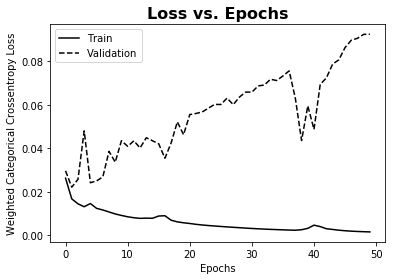

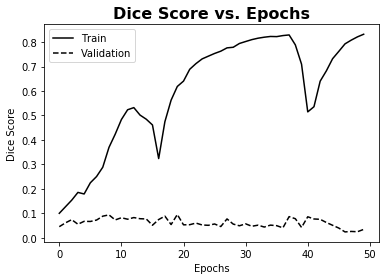

In [6]:
start = timeit.default_timer()
train(
    path_train_images, path_train_annotations, train_batch_size, 
    path_val_images, path_val_annotations, val_batch_size,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights, path_vgg_weights = path_vgg_weights, train_vgg = train_vgg, path_load_weights = None
)
end = timeit.default_timer()

In [7]:
print('Total training time: ', end - start)

('Total training time: ', 32139.85964989662)


In [6]:
epochs = 38

In [7]:
predict(
    path_train_images, path_train_annotations, path_train_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics, 
    path_save_weights
)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   9457992
           1       0.52      1.00      0.69    175800

   micro avg       0.98      0.98      0.98   9633792
   macro avg       0.76      0.99      0.84   9633792
weighted avg       0.99      0.98      0.99   9633792

('F1/dice (binary): ', 0.685591793823522)
('Jaccard/IOU: ', 0.5215973170297382)


In [ ]:
visualize_dataset(
    path_train_images, path_train_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_train_predictions
)

In [9]:
predict(
    path_val_images, path_val_annotations, path_val_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    547242
           1       0.06      0.18      0.09      4694

   micro avg       0.97      0.97      0.97    551936
   macro avg       0.53      0.58      0.54    551936
weighted avg       0.98      0.97      0.98    551936

('F1/dice (binary): ', 0.08807151979565774)
('Jaccard/IOU: ', 0.04606423342061668)


In [ ]:
visualize_dataset(
    path_val_images, path_val_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations,
    dir_predictions = path_val_predictions
)

In [11]:
predict(
    path_test_images, path_test_annotations, path_test_predictions,
    n_classes, input_width, input_height, 
    model_name, epochs, loss, optimizer, metrics,
    path_save_weights
)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96    585528
           1       0.11      0.26      0.16     16584

   micro avg       0.92      0.92      0.92    602112
   macro avg       0.55      0.60      0.56    602112
weighted avg       0.95      0.92      0.94    602112

('F1/dice (binary): ', 0.15777245067305917)
('Jaccard/IOU: ', 0.08564221652786676)


In [ ]:
visualize_dataset(
    path_test_images, path_test_annotations, 
    n_classes, n_channel_annotations = n_channel_annotations, 
    dir_predictions = path_test_predictions
)